#  Concrete Manufacturing - Assignment

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import math

In [44]:
Data=pd.read_csv('concrete.csv')
Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
#Variables
#Cement : measured in kg in a m3 mixture
#Blast : measured in kg in a m3 mixture
#Fly ash : measured in kg in a m3 mixture
#Water : measured in kg in a m3 mixture
#Superplasticizer : measured in kg in a m3 mixture
#Coarse Aggregate : measured in kg in a m3 mixture
#Fine Aggregate : measured in kg in a m3 mixture
#Age : day (1~365)
#Concrete compressive strength measured in MPa

In [45]:
Data.isnull().sum()
#Seems like no null values are present

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [46]:
Data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#  Exploratory Data Analysis

In [47]:
#Analysing inputs
Data_input=Data.drop('strength',axis=1)
Data_input.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [48]:
Data_input.keys()

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

## Multivariate Analysis

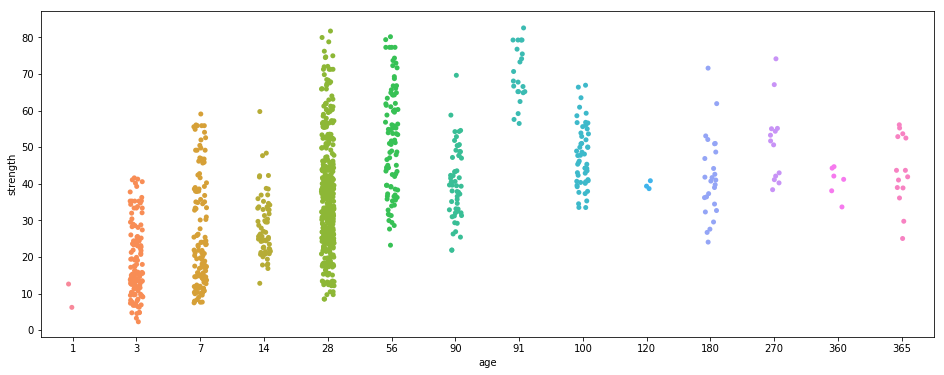

In [49]:
plt.gcf().set_size_inches(16,6)
sns.stripplot(Data_input['age'],Data['strength'])
#Strength appears very high if the age is around 91-91 days
#A weak parabolic (probably quadratic) relation seems to emerge between age and strength

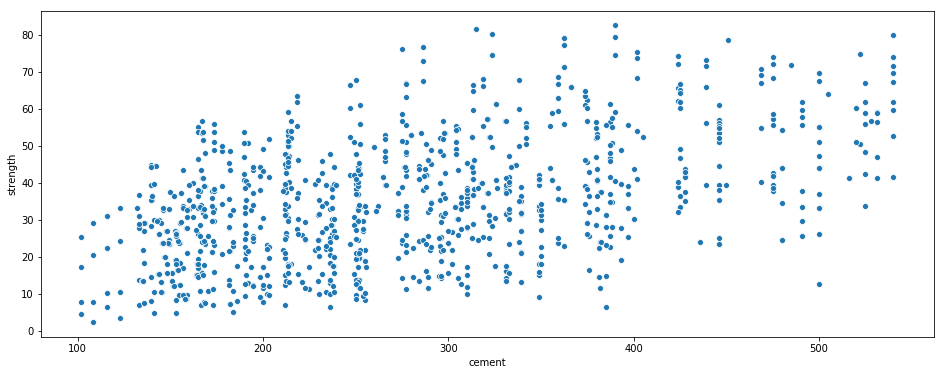

In [13]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data_input['cement'],Data['strength'])
#A weak relationship between the features observed

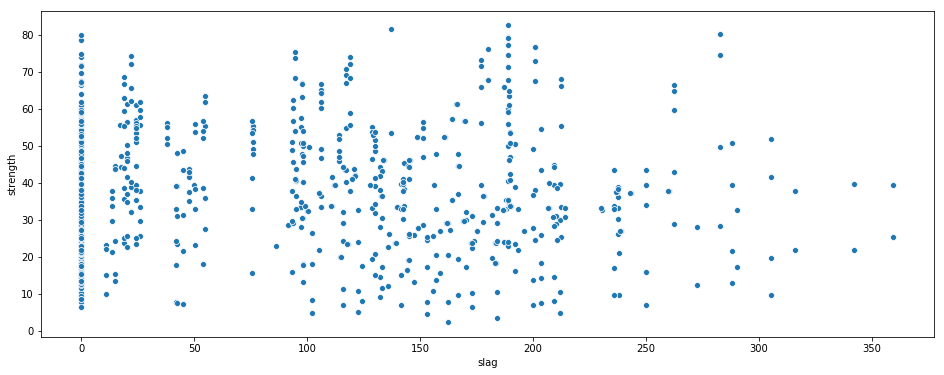

In [50]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data_input['slag'],Data['strength'])

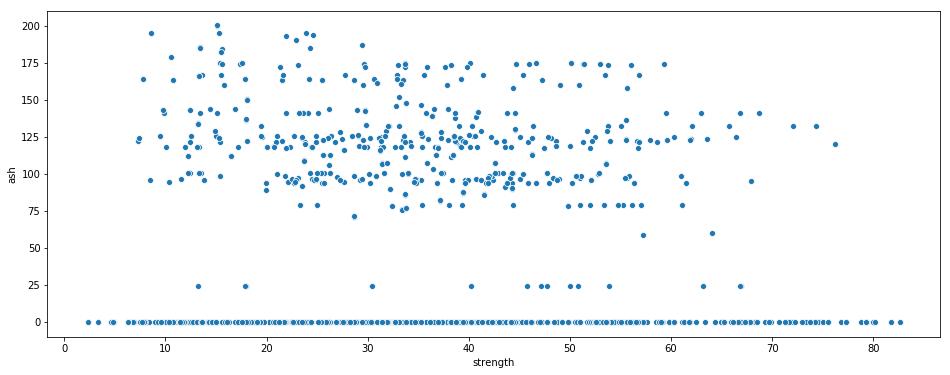

In [51]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['ash'])   
#Non-linear relationship probably logarithmic

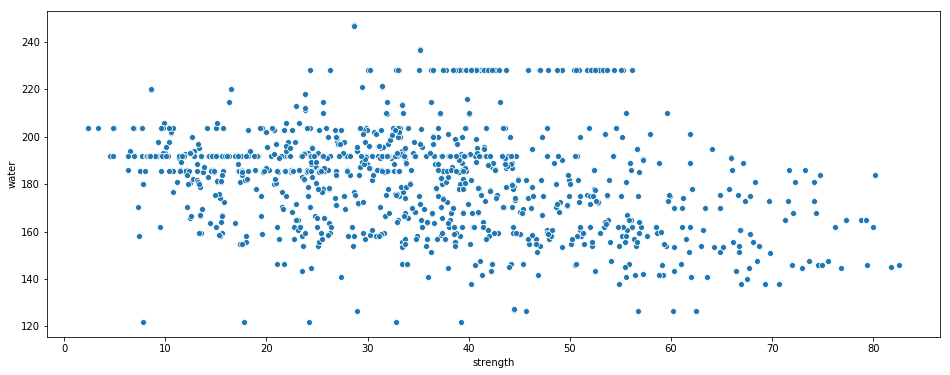

In [52]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['water'])   
#No apparent relationship

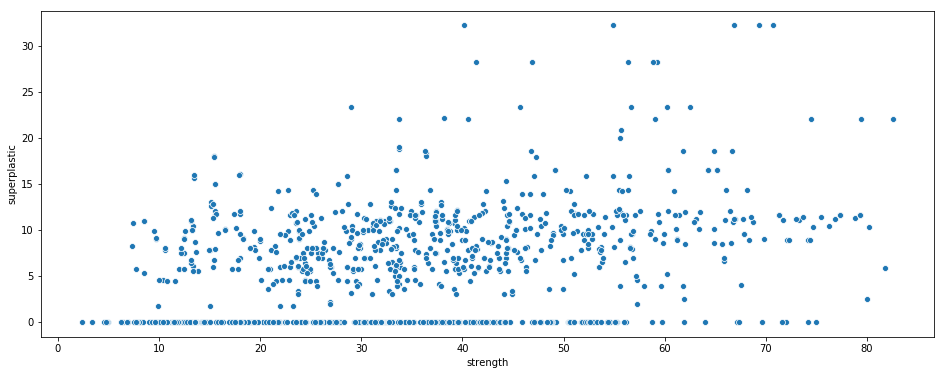

In [21]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['superplastic'])   
#Non-linear relationship probably logarithmic

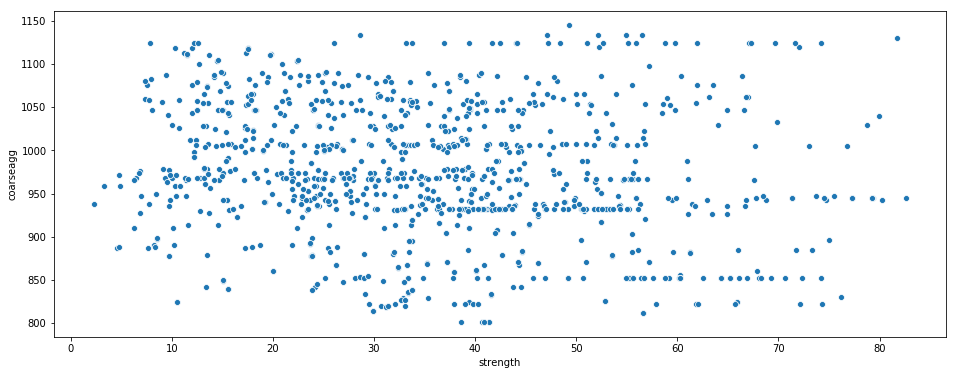

In [22]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['coarseagg'])   
#No apparent relationship 

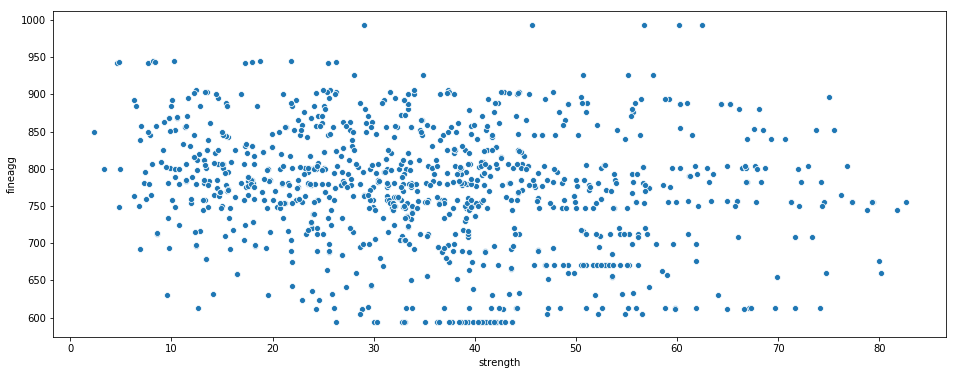

In [53]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['fineagg'])   
#No apparent relationship

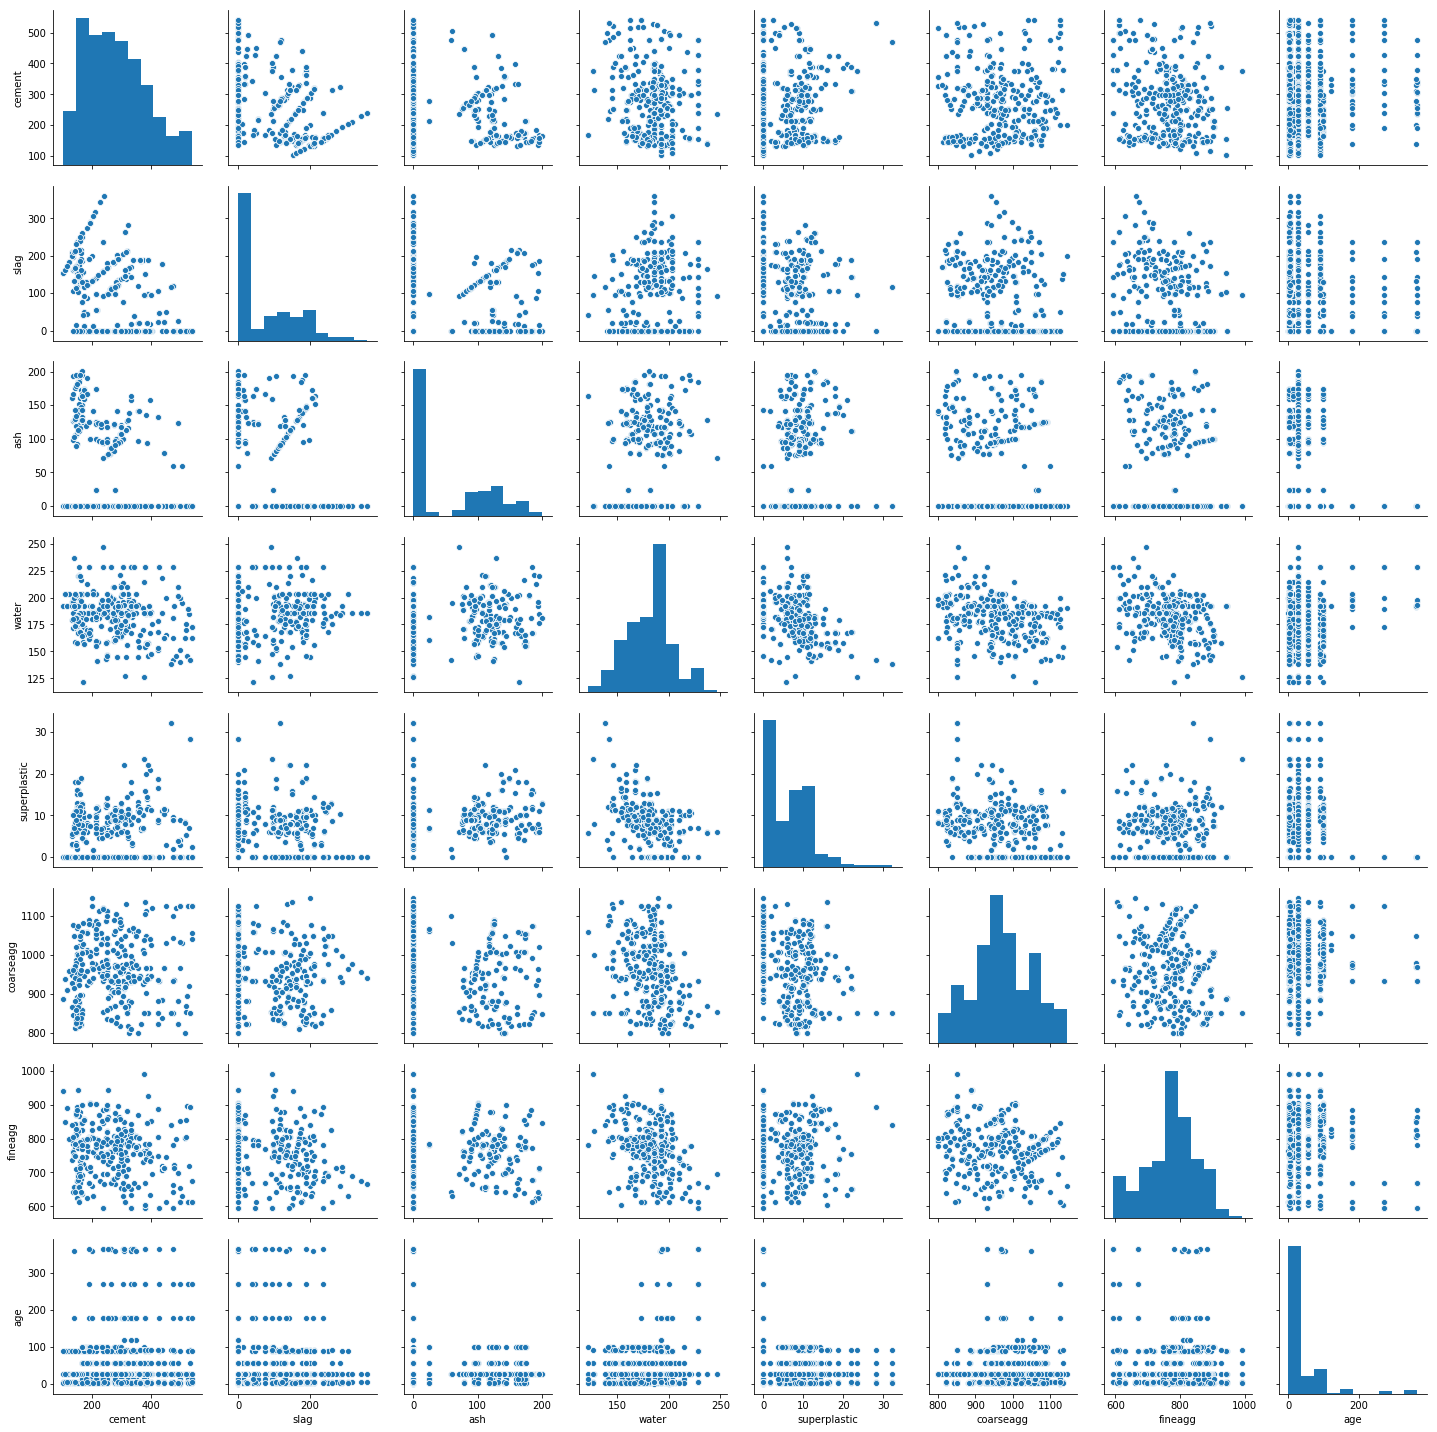

In [8]:
sns.pairplot(Data_input)

In [54]:
Data_input.corr()
# High correlation between superplastic and water (neg)
# Correlation between fineagg and water (neg), superplastic and ash (pos), cement and ash (neg), ash and slag (neg)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000


## Univariate Analysis

In [55]:
Data.describe()
# Age and Slag seem to have outliers. Need to investigate

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


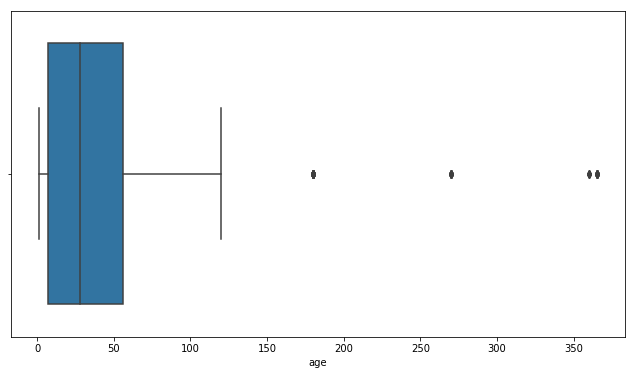

In [56]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['age'])
# Outliers detected

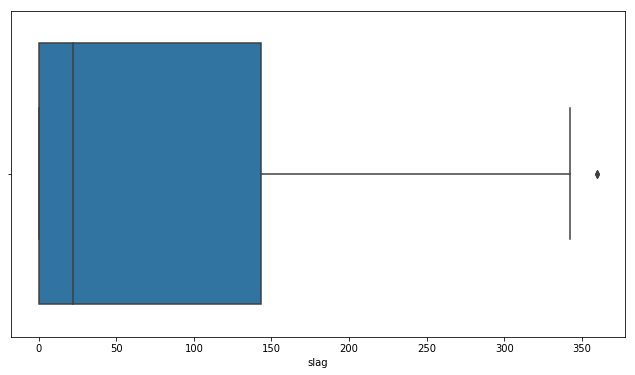

In [31]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['slag'])
#Outlier detected

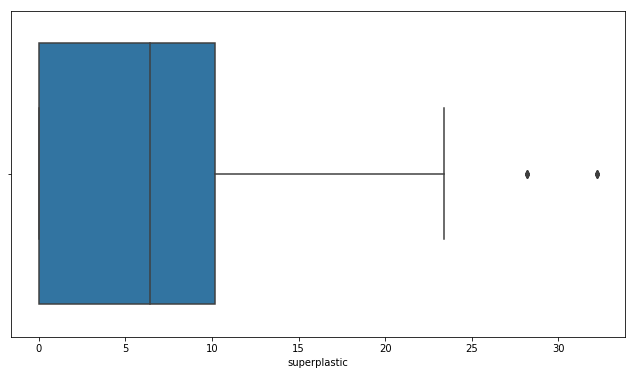

In [32]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['superplastic'])
#Superplastic also has outliers

## Performing scaling to remove outliers as the sample size is too small, and removing samples would harm the training exercise

In [57]:
from scipy.stats import zscore

In [58]:
zscaled_data=Data_input.apply(zscore)
zscaled_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [59]:
zscaled_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,9.593189e-18,3.634633e-16,-2.014570e-16,1.103756e-16,7.116206e-16,9.537139e-16,3.794160e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


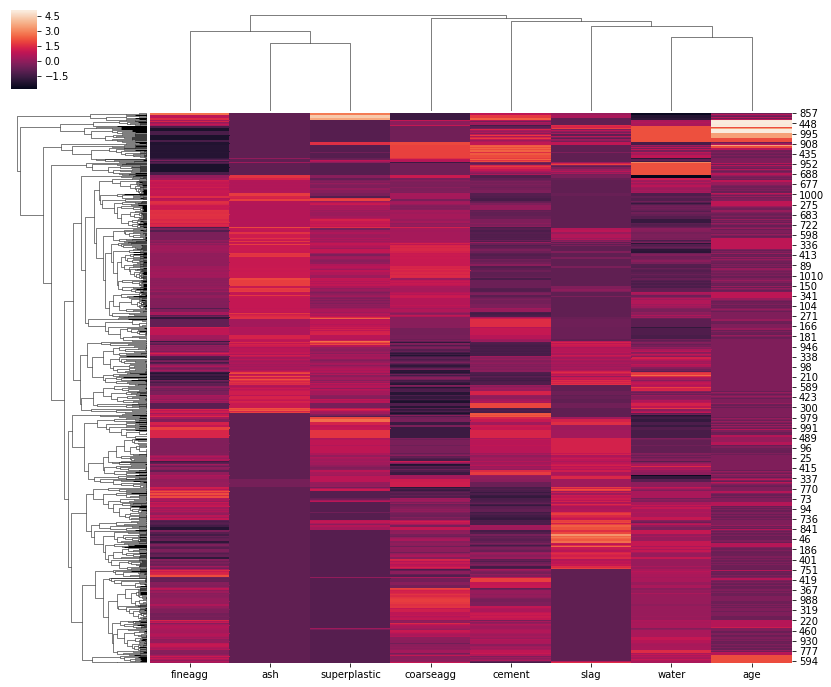

In [60]:
sns.clustermap(zscaled_data,figsize=(14, 12)) 